### Set up environment

In [127]:
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
from pandas.io.json import json_normalize
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
from IPython.display import HTML
import seaborn as sns
import time
# install wordcloud
!conda install -c conda-forge wordcloud --yes 
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes 
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [128]:
df = pd.read_csv('Classeur2.csv')
df.head(5)

,PostalCode,Neighbourhood,Latitude,Longitude
0,69550,ROCHEFORT,45.965198,4.326763
1,69470,LA VILLE,46.108714,4.336994
2,69470,THEL,46.108714,4.336994
3,69690,POMERIEUX,45.774361,4.547382
4,69690,LURCIEUX,45.774361,4.547382


In [129]:
address = 'Lyon, FR'
geolocator = Nominatim(user_agent="FR_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lyon City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lyon City are 45.7578137, 4.8320114.


In [130]:
neighborhood_latitude=45.7578137
neighborhood_longitude=4.8320114

In [131]:
CLIENT_ID = 'HRLNXB2AIKDECQI4BIOTTXOAKNHSPI3A4RI5CXWI1WEWN5TP' # your Foursquare ID
CLIENT_SECRET = 'CFYVO5MHOLA2OESHCKQPJPCSZPO44TJXS1CNBRKXUFIO1EN5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HRLNXB2AIKDECQI4BIOTTXOAKNHSPI3A4RI5CXWI1WEWN5TP
CLIENT_SECRET:CFYVO5MHOLA2OESHCKQPJPCSZPO44TJXS1CNBRKXUFIO1EN5


In [132]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of ROCHEFORT are 45.9651984924, 4.32676291669.


In [133]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=HRLNXB2AIKDECQI4BIOTTXOAKNHSPI3A4RI5CXWI1WEWN5TP&client_secret=CFYVO5MHOLA2OESHCKQPJPCSZPO44TJXS1CNBRKXUFIO1EN5&v=20180605&ll=45.9651984924,4.32676291669&radius=1000&limit=100'

In [134]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e0f9016b9a389001bcafea1'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 45.97419850140001,
    'lng': 4.339686621733611},
   'sw': {'lat': 45.95619848339999, 'lng': 4.313839211646389}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d455a7bbefe236a1671fee2',
       'name': "Gare SNCF d'Amplepuis",
       'location': {'address': 'Place de la Gare',
        'lat': 45.971029882615994,
        'lng': 4.326840199662515,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.971029882615994,
          'lng': 4.326840199662515}],
        'distance': 649,
        'postalCode': '6

###explore

In [135]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [136]:
lyon_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

ROCHEFORT
LA VILLE
THEL
POMERIEUX
LURCIEUX
LA CALONNIERE
ARBUISSONNAS
LA ROCHE
ST PIERRE
LE BOULARD
LA RODIERE
SEPT CHEMINS
ST MARTIN DE CORNAS
VEISSIEUX
POMERIEUX
LYON 01
LYON 02
LYON 03
LYON 04
LYON 05
LYON 06
LYON 07
LYON 08
LYON 09
VILLEURBANNE
STE FOY LES LYON
CHIROUBLES
VAULX EN VELIN
COLOMBIER SAUGNIEU
LYON ST EXUPERY AEROPORT
BRINDAS
ECULLY
RILLIEUX LA PAPE
CREPIEUX LA PAPE
LE MOLARD
DECINES CHARPIEU
TASSIN LA DEMI LUNE
JOUX
TARARE
DIEME
AFFOUX
ST CLEMENT SUR VALSONNE
ST MARCEL L ECLAIRE
VALSONNE
LES SAUVAGES
ST APPOLINAIRE
ST FONS
VENISSIEUX
CHEVINAY
SAVIGNY
ST GERMAIN NUELLES
SAIN BEL
ST PIERRE LA PALUD
L ARBRESLE
EVEUX
ST GERMAIN NUELLES
LENTILLY
BULLY
FLEURIEUX SUR L ARBRESLE
SOURCIEUX LES MINES
CERCIE
ST LAGER
CORCELLES EN BEAUJOLAIS
CHARENTAY
LANCIE
TAPONAS
BELLEVILLE
DRACE
ST JEAN D ARDIERES
ST GENIS LAVAL
ST VINCENT DE REINS
BOURG DE THIZY
PONT TRAMBOUZE
THIZY LES BOURGS
LA CHAPELLE DE MARDORE
MARDORE
MARNAND
POLEYMIEUX AU MONT D OR
NEUVILLE SUR SAONE
MONTANAY
FLEURIEU 

In [137]:
print(lyon_venues.shape)
lyon_venues.head()

(10614, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ROCHEFORT,45.965198,4.326763,Gare SNCF d'Amplepuis,45.971030,4.326840,Train Station
1,ROCHEFORT,45.965198,4.326763,Rivière,45.960671,4.335830,River
2,ROCHEFORT,45.965198,4.326763,Hippodrome,45.960487,4.336085,Racetrack
3,ROCHEFORT,45.965198,4.326763,Boulangerie Vermorel,45.972534,4.332743,Bakery
4,POMERIEUX,45.774361,4.547382,Bessenay Place Du Marché,45.776110,4.553582,Plaza


In [138]:
lyon_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ABU DHABI,99,99,99,99,99,99
ACCRA,2,2,2,2,2,2
ADDIS ABABA,3,3,3,3,3,3
ALBIGNY SUR SAONE,5,5,5,5,5,5
ALGIERS,9,9,9,9,9,9
AMBERIEUX D AZERGUES,4,4,4,4,4,4
AMMAN,100,100,100,100,100,100
AMPLEPUIS,4,4,4,4,4,4
AMSTERDAM,100,100,100,100,100,100


In [139]:
print('There are {} uniques categories.'.format(len(lyon_venues['Venue Category'].unique())))

There are 518 uniques categories.


In [140]:
lyon_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Hotel                 630
Café                  602
Coffee Shop           431
Restaurant            403
Bar                   319
Italian Restaurant    249
French Restaurant     203
Plaza                 202
Bakery                176
Pizza Place           163
Name: Neighborhood, dtype: int64

In [141]:
# plotting configurations

%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)
fig_fc = '#ffffff'
pc = ["#4285f4", "#db4437", "#f4b400", "#0f9d58", "#ab47bc", "#00acc1", "#ff7043", 
      "#9e9d24", "#5c6bc0", "#f06292", "#00796b", "#c2185b", "#7e57c2", "#03a9f4", 
      "#8bc34a", "#fdd835", "#fb8c00", "#8d6e63", "#9e9e9e", "#607d8b"]

def plot_conf(ax, xlbl='', ylbl='', t=''):
    """
    This function perform operations to produce better-looking 
    visualizations
    """
    # changing the background color of the plot
    ax.set_facecolor('#ffffff')
    # modifying the ticks on plot axes
    ax.tick_params(axis='both', labelcolor='#616161', color='#ffffff')
    ax.tick_params(axis='both', which='major', labelsize=9)
    # adding a grid and specifying its color
    ax.grid(True, color='#e9e9e9')
    # making the grid appear behind the graph elements
    ax.set_axisbelow(True)
    # hiding axes
    ax.spines['bottom'].set_color('#ffffff')
    ax.spines['top'].set_color('#ffffff') 
    ax.spines['right'].set_color('#ffffff')
    ax.spines['left'].set_color('#ffffff')
    # setting the title, x label, and y label of the plot
    ax.set_title(t, fontsize=14, color='#616161', loc='left', pad=24, fontweight='bold');
    ax.set_xlabel(xlbl, labelpad=16, fontsize=11, color='#616161', fontstyle='italic');
    ax.set_ylabel(ylbl, color='#616161', labelpad=16, fontsize=11, fontstyle='italic');
    
# table configuration
styles = [
    dict(selector="td, th", props=[("border", "1px solid #333"), ("padding", "2px")]),
    dict(selector="th.col_heading", props=[("background", "#eee8d5"), ("color", "#b58900"), ("padding", "5px 8px")]),
    dict(selector="th.index_name", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "5px 8px")]),
    dict(selector="th.blank", props=[("background", "#eee8d5"), ("color", "#268bd2"), ("padding", "0")]),
    dict(selector="th.row_heading.level0", props=[("background", "rgba(133, 153, 0, 0.1)")]),
    dict(selector="th.row_heading.level1", props=[("background", "rgba(42, 161, 152, 0.1)")]),
    dict(selector="thead tr:nth-child(2) th", props=[("border-bottom", "3px solid #333333")]),
    dict(selector="td:hover", props=[("font-weight", "bold"), ("background", "#002b36"), ("color", "Gold")]),
]

disp_fmt = "<h2 style='color: #b58900'>{}<span style='color: #FF91CE; font-size: 115%'>:</span></h2>"

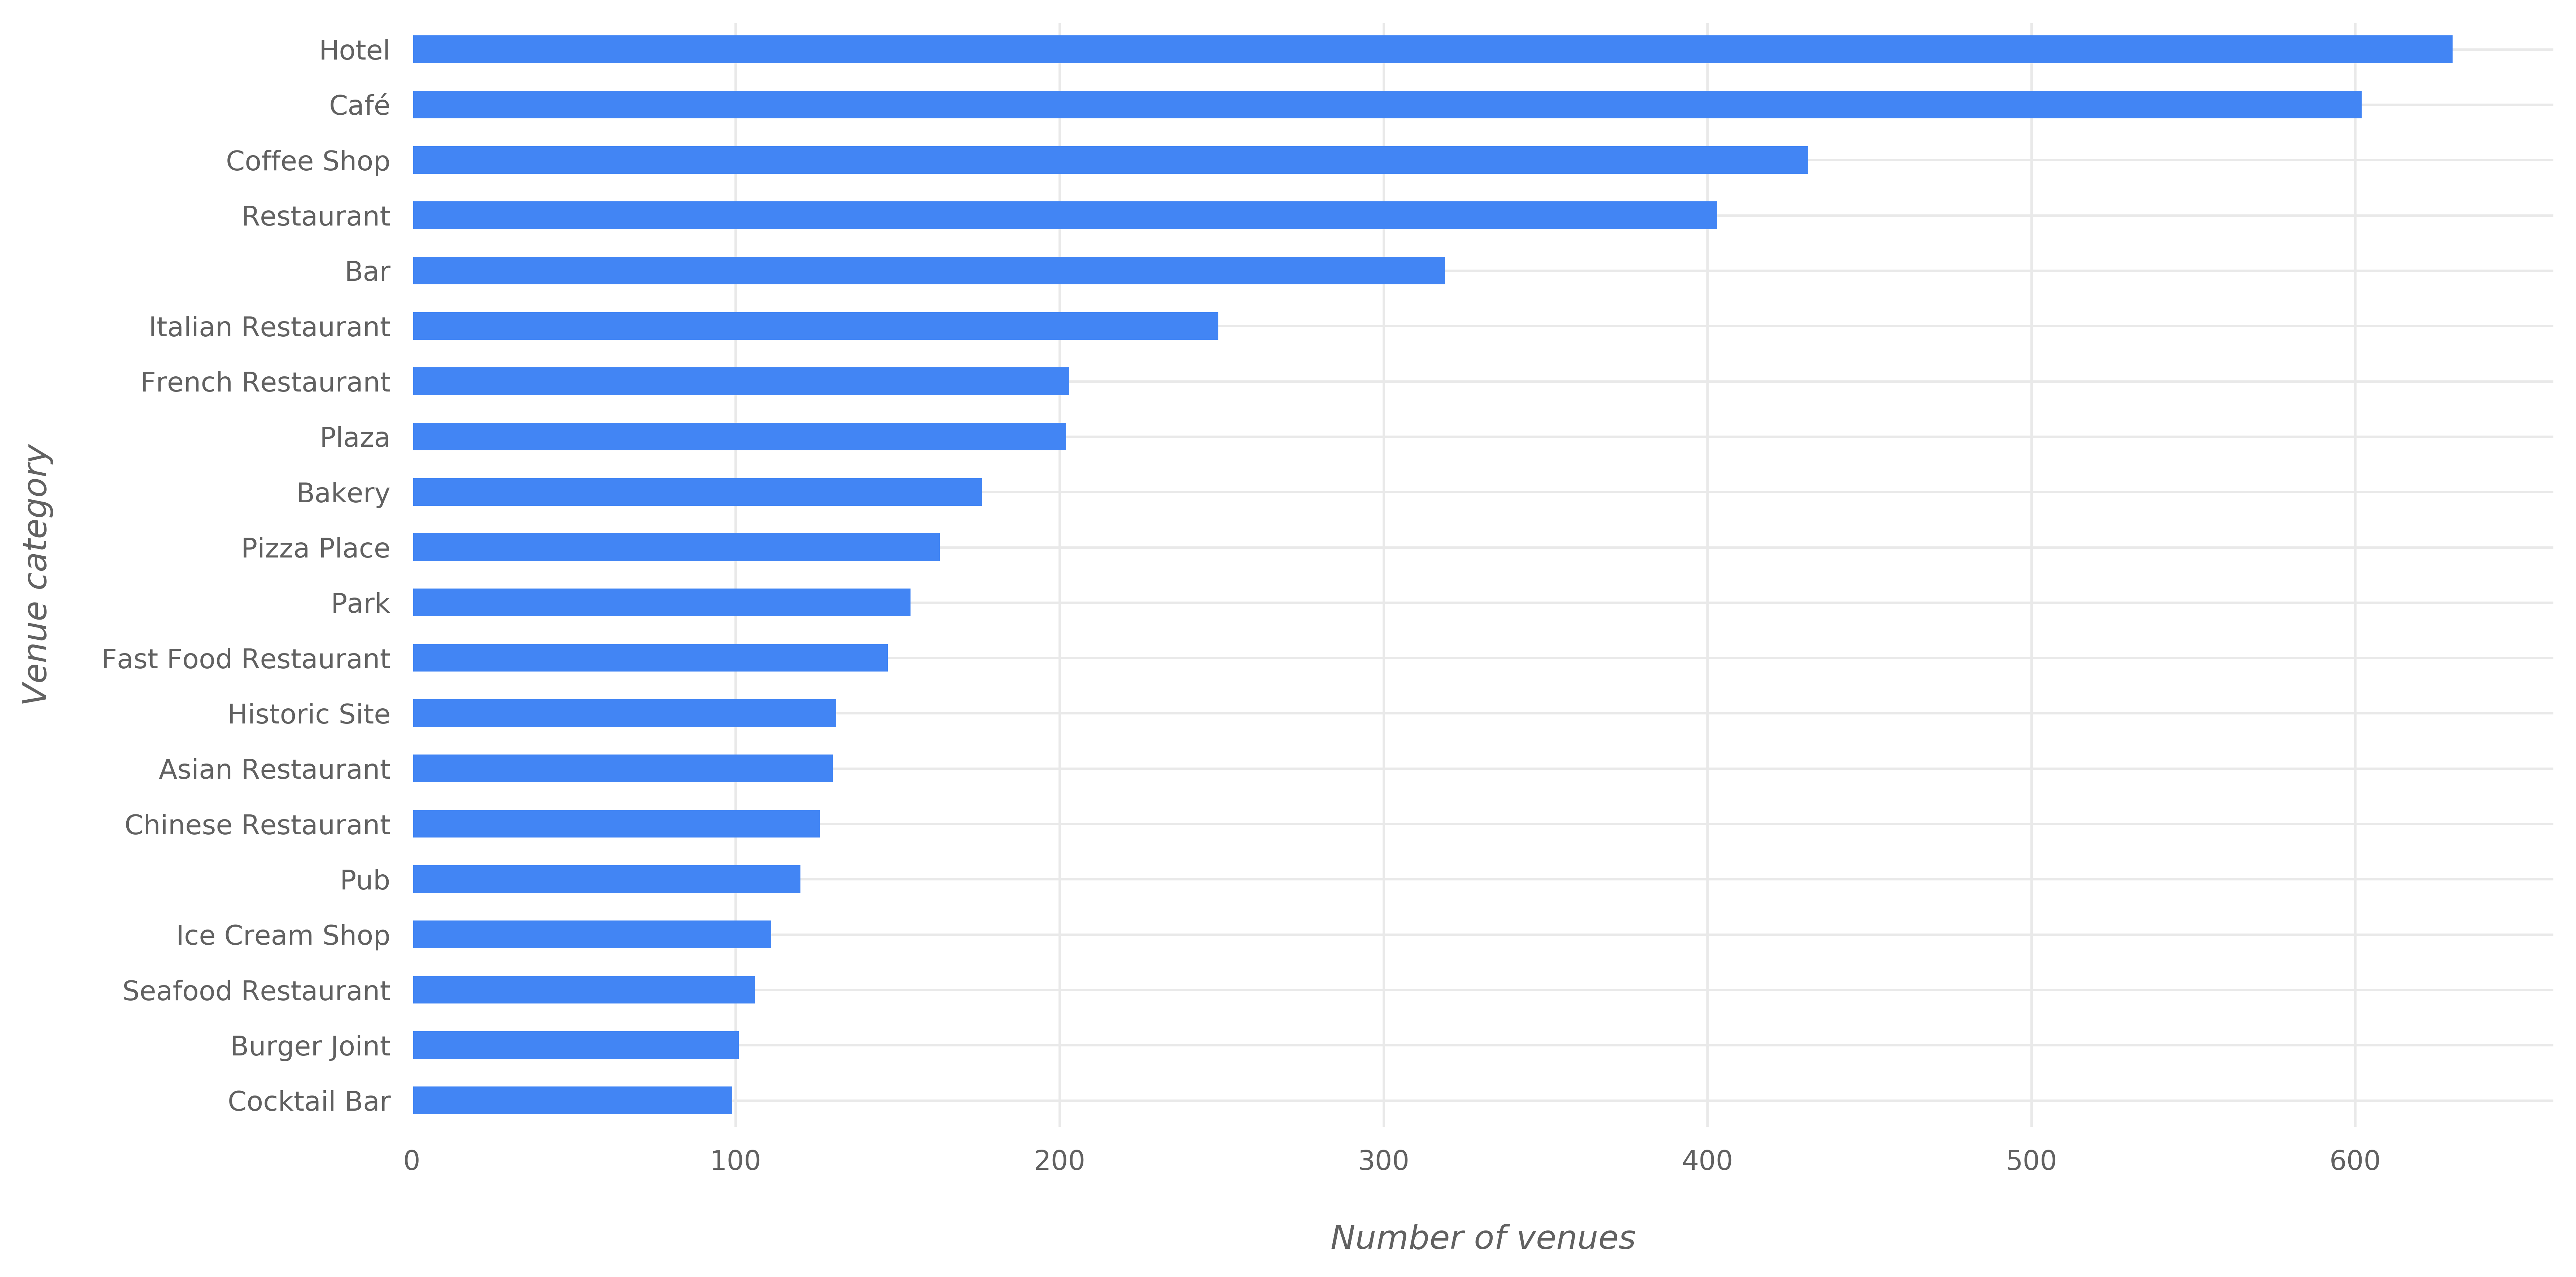

In [142]:
fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
lyon_top_vc = lyon_venues['Venue Category'].value_counts(normalize=False)
ax = lyon_top_vc.head(20).plot(kind='barh', color=pc[0]);
ax.invert_yaxis()
plot_conf(ax, xlbl='Number of venues', ylbl='Venue category', t='')
plt.tight_layout()
fig.savefig('most-common-ven-lyon.png', dpi=300)

In [143]:
# one hot encoding
lyon_onehot = pd.get_dummies(lyon_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lyon_onehot['Neighborhood'] = lyon_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lyon_onehot.columns[-1]] + list(lyon_onehot.columns[:-1])
lyon_onehot = lyon_onehot[fixed_columns]

lyon_onehot.head()

,Zoo Exhibit,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
#examine the new dataframe size.
lyon_onehot.shape

(10614, 518)

In [145]:
lyon_grouped = lyon_onehot.groupby('Neighborhood').mean().reset_index()
lyon_grouped.head()

,Neighborhood,Zoo Exhibit,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo
0,ABU DHABI,0.0,0.0,0.0,0.0,0.020202,0.0,0.0,0.0,0.020202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010101,0.0
1,ACCRA,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,ADDIS ABABA,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,ALBIGNY SUR SAONE,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,ALGIERS,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [146]:
num_top_venues = 5

for hood in lyon_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = lyon_grouped[lyon_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ABU DHABI----
                  venue  freq
0                  Café  0.08
1    Italian Restaurant  0.06
2  Fast Food Restaurant  0.06
3                 Hotel  0.05
4           Coffee Shop  0.04


----ACCRA----
                  venue  freq
0           Bus Station   0.5
1         Shopping Mall   0.5
2           Zoo Exhibit   0.0
3           Pastry Shop   0.0
4  Pakistani Restaurant   0.0


----ADDIS ABABA----
                  venue  freq
0            Restaurant  0.67
1             Hotel Bar  0.33
2      Pedestrian Plaza  0.00
3  Pakistani Restaurant  0.00
4                Palace  0.00


----ALBIGNY SUR SAONE----
                    venue  freq
0       French Restaurant   0.4
1      Seafood Restaurant   0.2
2  Furniture / Home Store   0.2
3                   Diner   0.2
4             Zoo Exhibit   0.0


----ALGIERS----
    venue  freq
0   Hotel  0.22
1   Plaza  0.22
2    Café  0.11
3    Park  0.11
4  Market  0.11


----AMBERIEUX D AZERGUES----
               venue  freq
0  French Re

In [147]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [148]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lyon_grouped['Neighborhood']

for ind in np.arange(lyon_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lyon_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ABU DHABI,Café,Fast Food Restaurant,Italian Restaurant,Hotel,Coffee Shop,Ice Cream Shop,Movie Theater,Fried Chicken Joint,Spa,Clothing Store
1,ACCRA,Bus Station,Shopping Mall,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish & Chips Shop
2,ADDIS ABABA,Restaurant,Hotel Bar,Zoo,Fish & Chips Shop,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market,Financial or Legal Service
3,ALBIGNY SUR SAONE,French Restaurant,Diner,Furniture / Home Store,Seafood Restaurant,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market,Zoo
4,ALGIERS,Hotel,Plaza,Burger Joint,Park,Pizza Place,Café,Market,Filipino Restaurant,Financial or Legal Service,Field


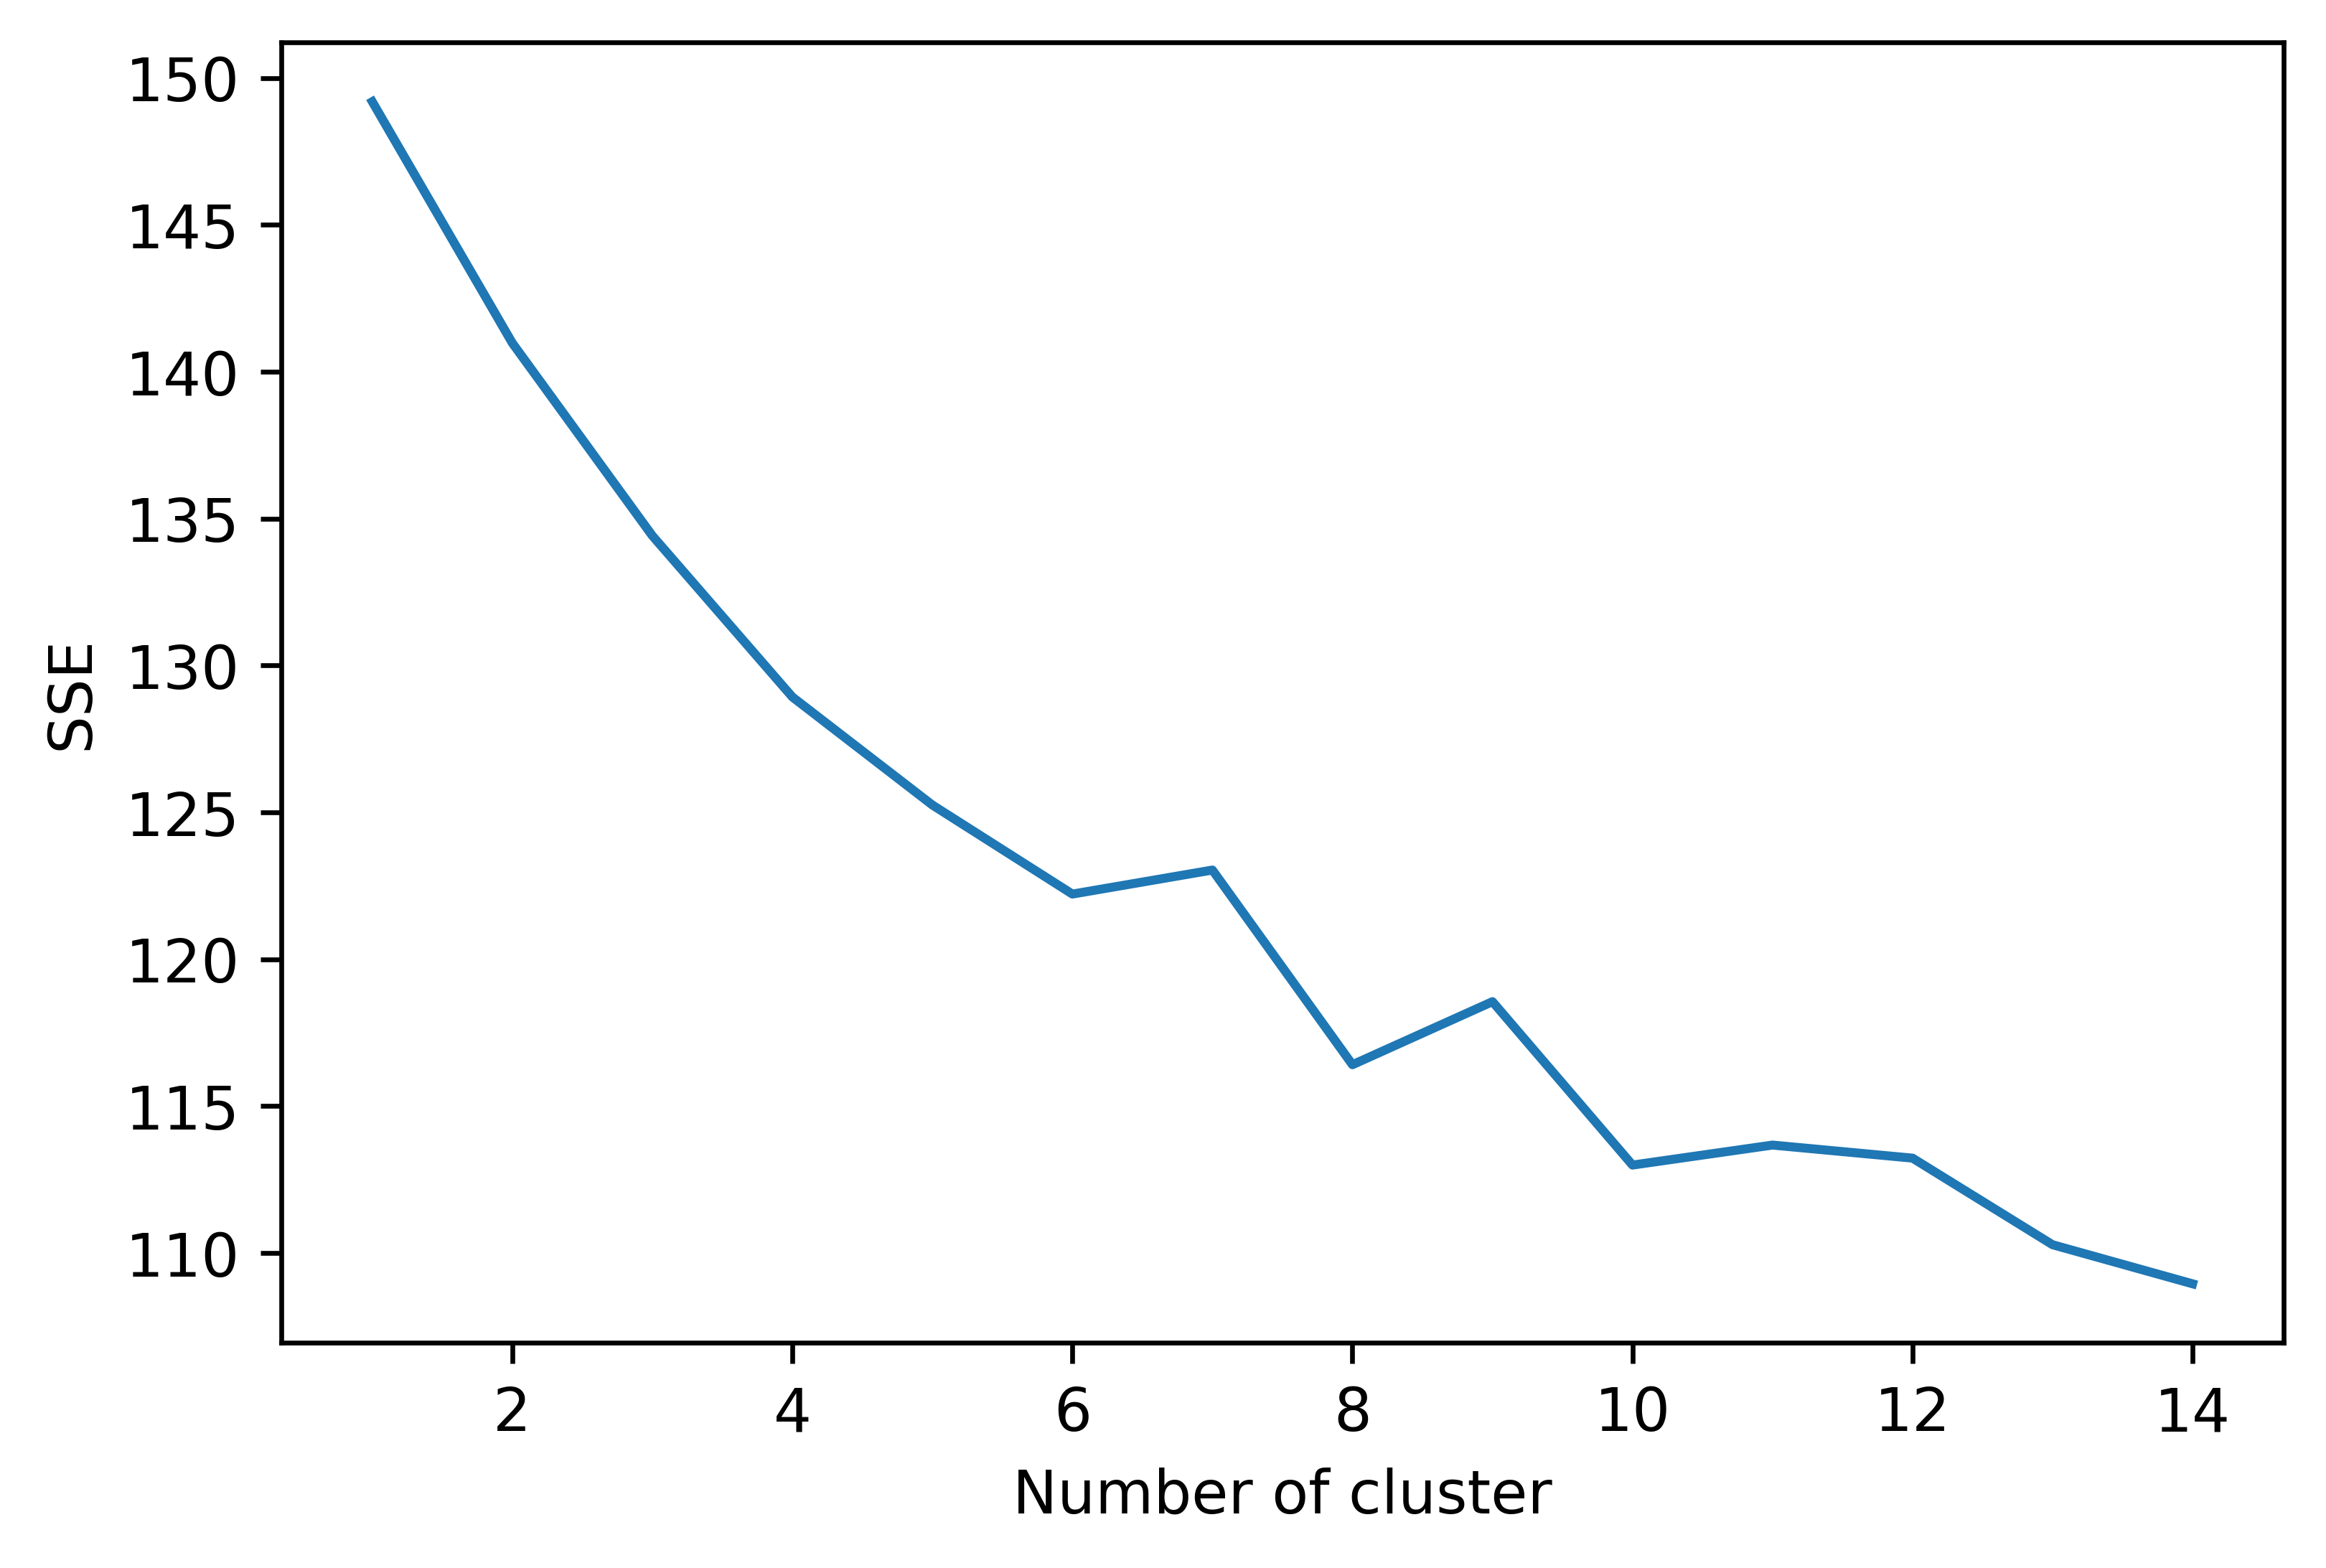

In [149]:
###find the optimal k value for clustering and we do it using the elbow method
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(lyon_grouped.drop('Neighborhood',axis=1))
    lyon_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
fig.savefig('KMeans.png', dpi=300)

In [150]:
# set number of clusters
kclusters = 7

lyon_grouped_clustering = lyon_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lyon_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 5, 1, 3, 3, 3, 2, 0, 2])

In [151]:
lyon_grouped_clustering.head(5)

,Zoo Exhibit,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,...,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yakitori Restaurant,Yoga Studio,Zoo,Cluster
0,0.0,0.0,0.0,0.0,0.020202,0.0,0.0,0.0,0.020202,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010101,0.0,0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,12
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,6


Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [152]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

lyon_merged = df

# merge toronto_grouped with  to add latitude/longitude for each neighborhood
lyon_merged = lyon_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

lyon_merged.head() # check the last columns!

,PostalCode,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,69550,ROCHEFORT,45.965198,4.326763,2.0,Train Station,River,Bank,Bakery,Auto Workshop,Farm,Nightclub,Racetrack,Fruit & Vegetable Store,Farmers Market
1,69470,LA VILLE,46.108714,4.336994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,69470,THEL,46.108714,4.336994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,69690,POMERIEUX,45.774361,4.547382,3.0,Café,Basketball Stadium,Athletics & Sports,Home Service,Plaza,Fish Taverna,Food,Fondue Restaurant,Flower Shop,Flea Market
4,69690,LURCIEUX,45.774361,4.547382,3.0,Plaza,Café,Basketball Stadium,Athletics & Sports,Fish Taverna,Food,Fondue Restaurant,Flower Shop,Flea Market,Zoo


In [153]:
lyon_merged=lyon_merged.dropna()
lyon_merged['Cluster_Labels'] = lyon_merged.Cluster_Labels.astype(int)
lyon_merged.head(5)

,PostalCode,Neighbourhood,Latitude,Longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,69550,ROCHEFORT,45.965198,4.326763,2,Train Station,River,Bank,Bakery,Auto Workshop,Farm,Nightclub,Racetrack,Fruit & Vegetable Store,Farmers Market
3,69690,POMERIEUX,45.774361,4.547382,3,Café,Basketball Stadium,Athletics & Sports,Home Service,Plaza,Fish Taverna,Food,Fondue Restaurant,Flower Shop,Flea Market
4,69690,LURCIEUX,45.774361,4.547382,3,Plaza,Café,Basketball Stadium,Athletics & Sports,Fish Taverna,Food,Fondue Restaurant,Flower Shop,Flea Market,Zoo
5,69690,LA CALONNIERE,45.796946,4.548951,2,Trail,Zoo,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market
6,69460,ARBUISSONNAS,46.045303,4.630893,5,French Restaurant,Construction & Landscaping,Zoo,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market,Food Court



5. Examine Clusters
Cluster 1


In [154]:
c1=lyon_merged.loc[lyon_merged['Cluster_Labels'] == 0, lyon_merged.columns[[1] + list(range(5, lyon_merged.shape[1]))]]

In [155]:
c2=lyon_merged.loc[lyon_merged['Cluster_Labels'] == 1, lyon_merged.columns[[1] + list(range(5, lyon_merged.shape[1]))]]

In [156]:
c3=lyon_merged.loc[lyon_merged['Cluster_Labels'] == 2, lyon_merged.columns[[1] + list(range(5, lyon_merged.shape[1]))]]

In [157]:
c4=lyon_merged.loc[lyon_merged['Cluster_Labels'] == 3, lyon_merged.columns[[1] + list(range(5, lyon_merged.shape[1]))]]

In [158]:
c5=lyon_merged.loc[lyon_merged['Cluster_Labels'] == 4, lyon_merged.columns[[1] + list(range(5, lyon_merged.shape[1]))]]

In [159]:
c6=lyon_merged.loc[lyon_merged['Cluster_Labels'] == 5, lyon_merged.columns[[1] + list(range(5, lyon_merged.shape[1]))]]

In [160]:
c7=lyon_merged.loc[lyon_merged['Cluster_Labels'] == 6, lyon_merged.columns[[1] + list(range(5, lyon_merged.shape[1]))]]

6.Visualize the resulting clusters

In [161]:
# create map
map_clusters = folium.Map(location=[45.7699284397, 4.8292246498], zoom_start=10, tiles='Stamen Terrain')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(lyon_merged['Latitude'], lyon_merged['Longitude'], lyon_merged['Neighbourhood'], lyon_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=1).add_to(map_clusters)
              
map_clusters

In [162]:
map_clusters.save('Rhone clusters.html')

In [163]:
# create map
map_clusters = folium.Map(location=[45.7699284397, 4.8292246498], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(lyon_merged['Latitude'], lyon_merged['Longitude'], lyon_merged['Neighbourhood'], lyon_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[cluster -1],
        fill_opacity=1).add_to(map_clusters)
              
map_clusters

In [164]:
map_clusters.save('World clusters.html')

In [165]:
c1

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,LA ROCHE,Other Repair Shop,Plaza,Zoo,Food & Drink Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
15,LYON 01,French Restaurant,Bar,Pub,Café,Plaza,Cocktail Bar,Lyonese Bouchon,Bakery,Ice Cream Shop,Fast Food Restaurant
16,LYON 02,Hotel,French Restaurant,Café,Bakery,Restaurant,Sandwich Place,Pub,Italian Restaurant,Plaza,Fast Food Restaurant
18,LYON 04,French Restaurant,Bar,Plaza,Pub,Bakery,Park,Sandwich Place,Theater,Pizza Place,River
20,LYON 06,French Restaurant,Hotel,Japanese Restaurant,Bakery,Bus Stop,Plaza,Fast Food Restaurant,Café,Sandwich Place,Sushi Restaurant
21,LYON 07,Pizza Place,Beer Garden,Sandwich Place,Asian Restaurant,Grocery Store,Plaza,Seafood Restaurant,Coffee Shop,Bar,French Restaurant
23,LYON 09,French Restaurant,Italian Restaurant,Restaurant,Plaza,Kebab Restaurant,Fabric Shop,Soccer Field,Shopping Mall,River,Racetrack
25,STE FOY LES LYON,Basketball Court,Bath House,Park,Food & Drink Shop,Zoo,Food Court,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
31,ECULLY,Pizza Place,Hotel,Clothing Store,Supermarket,Gym / Fitness Center,Bookstore,Auto Dealership,Sandwich Place,Electronics Store,Seafood Restaurant
41,ST CLEMENT SUR VALSONNE,Karaoke Bar,Tennis Stadium,Plaza,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market


In [ ]:
# drop First column
c1.drop(['Neighbourhood'], axis='columns', inplace=True)

# add stopwords
STOPWORDS.add('Most')
STOPWORDS.add('Common')
STOPWORDS.add('Venue')
STOPWORDS.add('1st')
STOPWORDS.add('2nd')
STOPWORDS.add('3rd')
STOPWORDS.add('4th')
STOPWORDS.add('5th')
STOPWORDS.add('6th')
STOPWORDS.add('7th')
STOPWORDS.add('8th')
STOPWORDS.add('9th')
STOPWORDS.add('10th')

# Draw WordCloud
text = c1
wordcloud = WordCloud(
    width = 1500,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('c1w.png', dpi=300)

In [167]:
c2

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,ST PIERRE,French Restaurant,Athletics & Sports,Construction & Landscaping,Automotive Shop,Zoo,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna
9,LE BOULARD,Liquor Store,French Restaurant,Theme Park,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Zoo,Food & Drink Shop
11,SEPT CHEMINS,Construction & Landscaping,Gas Station,Train Station,Hardware Store,Photography Studio,French Restaurant,Zoo,Fish & Chips Shop,Flea Market,Fish Taverna
26,CHIROUBLES,Vineyard,Food Court,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market
81,ALBIGNY SUR SAONE,French Restaurant,Diner,Furniture / Home Store,Seafood Restaurant,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market,Zoo
84,COUZON AU MONT D OR,Train Station,French Restaurant,Nightclub,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market,Fish & Chips Shop,Financial or Legal Service
101,PUSIGNAN,French Restaurant,Bakery,Pharmacy,Construction & Landscaping,Fish & Chips Shop,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market
113,MARCILLY D AZERGUES,Train Station,Auto Workshop,Castle,Gym / Fitness Center,Construction & Landscaping,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market
115,DOMMARTIN,Pharmacy,Music Venue,Construction & Landscaping,Zoo,Fish Market,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Financial or Legal Service
120,CHATILLON,Train Station,Pharmacy,Construction & Landscaping,French Restaurant,Auto Workshop,Financial or Legal Service,Flea Market,Fish Taverna,Fish Market,Fish & Chips Shop


In [ ]:
# drop First column
c2.drop(['Neighbourhood'], axis='columns', inplace=True)

# add stopwords
STOPWORDS.add('Most')
STOPWORDS.add('Common')
STOPWORDS.add('Venue')
STOPWORDS.add('1st')
STOPWORDS.add('2nd')
STOPWORDS.add('3rd')
STOPWORDS.add('4th')
STOPWORDS.add('5th')
STOPWORDS.add('6th')
STOPWORDS.add('7th')
STOPWORDS.add('8th')
STOPWORDS.add('9th')
STOPWORDS.add('10th')

# Draw WordCloud
text = c2
wordcloud = WordCloud(
    width = 1500,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('c2w.png', dpi=300)

In [169]:
c3

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ROCHEFORT,Train Station,River,Bank,Bakery,Auto Workshop,Farm,Nightclub,Racetrack,Fruit & Vegetable Store,Farmers Market
5,LA CALONNIERE,Trail,Zoo,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market
12,ST MARTIN DE CORNAS,Fast Food Restaurant,Supermarket,Cafeteria,Shopping Mall,Auto Dealership,Mobile Phone Shop,Train Station,Furniture / Home Store,Fried Chicken Joint,French Restaurant
13,VEISSIEUX,Train Station,Soccer Stadium,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
19,LYON 05,Bus Stop,French Restaurant,Plaza,Big Box Store,Electronics Store,Flower Shop,Grocery Store,Home Service,Paper / Office Supplies Store,Bakery
22,LYON 08,Bowling Alley,Supermarket,Gym / Fitness Center,Kebab Restaurant,Theater,Food & Drink Shop,Hotel,Pizza Place,Tour Provider,Comedy Club
24,VILLEURBANNE,Supermarket,Comedy Club,Coffee Shop,Sandwich Place,Pizza Place,Plaza,Electronics Store,Grocery Store,Pharmacy,Bakery
27,VAULX EN VELIN,Grocery Store,Amphitheater,Business Service,Bus Stop,Planetarium,Food & Drink Shop,Food,Fondue Restaurant,Flower Shop,Zoo
28,COLOMBIER SAUGNIEU,Soccer Field,Zoo,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market
29,LYON ST EXUPERY AEROPORT,Soccer Field,Zoo,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market


In [ ]:
# drop First column
c3.drop(['Neighbourhood'], axis='columns', inplace=True)

# add stopwords
STOPWORDS.add('Most')
STOPWORDS.add('Common')
STOPWORDS.add('Venue')
STOPWORDS.add('1st')
STOPWORDS.add('2nd')
STOPWORDS.add('3rd')
STOPWORDS.add('4th')
STOPWORDS.add('5th')
STOPWORDS.add('6th')
STOPWORDS.add('7th')
STOPWORDS.add('8th')
STOPWORDS.add('9th')
STOPWORDS.add('10th')

# Draw WordCloud
text = c3
wordcloud = WordCloud(
    width = 150,
    height = 50,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('c3w.png', dpi=300)

In [171]:
c4

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,POMERIEUX,Café,Basketball Stadium,Athletics & Sports,Home Service,Plaza,Fish Taverna,Food,Fondue Restaurant,Flower Shop,Flea Market
4,LURCIEUX,Plaza,Café,Basketball Stadium,Athletics & Sports,Fish Taverna,Food,Fondue Restaurant,Flower Shop,Flea Market,Zoo
14,POMERIEUX,Café,Basketball Stadium,Athletics & Sports,Home Service,Plaza,Fish Taverna,Food,Fondue Restaurant,Flower Shop,Flea Market
17,LYON 03,Hotel,Plaza,Sandwich Place,Tram Station,Restaurant,Bakery,Bar,Supermarket,French Restaurant,Squash Court
39,DIEME,Hotel,Zoo,Food & Drink Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
80,FLEURIEU SUR SAONE,Fish Market,Café,Bus Stop,Automotive Shop,Fish Taverna,Food,Fondue Restaurant,Flower Shop,Flea Market,Zoo
86,FONTAINES SUR SAONE,Gas Station,Hotel,Miscellaneous Shop,Train Station,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Food,Farmers Market
89,ROCHETAILLEE SUR SAONE,Supermarket,Boat or Ferry,Café,Train Station,Ice Cream Shop,Fruit & Vegetable Store,Food,Farmers Market,Fast Food Restaurant,Field
91,MARCY L ETOILE,Flower Shop,Child Care Service,Motel,Park,Hotel,Zoo,Fish Market,Flea Market,Fish Taverna,Fish & Chips Shop
93,CRAPONNE,Insurance Office,Furniture / Home Store,Farmers Market,Hotel,Zoo,Fish & Chips Shop,Flower Shop,Flea Market,Fish Taverna,Fish Market


In [ ]:
# drop First column
c4.drop(['Neighbourhood'], axis='columns', inplace=True)

# add stopwords
STOPWORDS.add('Most')
STOPWORDS.add('Common')
STOPWORDS.add('Venue')
STOPWORDS.add('1st')
STOPWORDS.add('2nd')
STOPWORDS.add('3rd')
STOPWORDS.add('4th')
STOPWORDS.add('5th')
STOPWORDS.add('6th')
STOPWORDS.add('7th')
STOPWORDS.add('8th')
STOPWORDS.add('9th')
STOPWORDS.add('10th')

# Draw WordCloud
text = c4
wordcloud = WordCloud(
    width = 1500,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('c4w.png', dpi=300)

In [173]:
c5

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,JOUX,French Restaurant,Zoo,Food & Drink Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
43,VALSONNE,French Restaurant,Zoo,Food & Drink Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
79,MONTANAY,Pharmacy,Bakery,Home Service,Zoo,Fish & Chips Shop,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market
95,POLLIONNAY,Home Service,Zoo,Food & Drink Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
132,LIMAS,Home Service,Rental Car Location,Automotive Shop,Pharmacy,Farm,Farmers Market,Fast Food Restaurant,Field,Fabric Shop,Filipino Restaurant
196,SARCEY,French Restaurant,Zoo,Food & Drink Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
204,SOUCIEU EN JARREST,Bakery,Home Service,Zoo,Food & Drink Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
211,CUBLIZE,Bakery,Home Service,Zoo,Food & Drink Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
216,ST ROMAIN EN GAL,Home Service,Zoo,Food & Drink Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop
251,THEIZE,French Restaurant,Zoo,Food & Drink Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop


In [ ]:
# drop First column
c5.drop(['Neighbourhood'], axis='columns', inplace=True)

# add stopwords
STOPWORDS.add('Most')
STOPWORDS.add('Common')
STOPWORDS.add('Venue')
STOPWORDS.add('1st')
STOPWORDS.add('2nd')
STOPWORDS.add('3rd')
STOPWORDS.add('4th')
STOPWORDS.add('5th')
STOPWORDS.add('6th')
STOPWORDS.add('7th')
STOPWORDS.add('8th')
STOPWORDS.add('9th')
STOPWORDS.add('10th')

# Draw WordCloud
text = c5
wordcloud = WordCloud(
    width = 1500,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('c5w.png', dpi=300)

In [175]:
c6

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,ARBUISSONNAS,French Restaurant,Construction & Landscaping,Zoo,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market,Food Court
54,EVEUX,Restaurant,Zoo,Fish & Chips Shop,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market,Financial or Legal Service
67,DRACE,Construction & Landscaping,Zoo,Food Court,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market
127,VOURLES,Construction & Landscaping,Hardware Store,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish & Chips Shop
157,LA FLACHERE,Construction & Landscaping,Automotive Shop,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish & Chips Shop
162,ST ANDRE LA COTE,Scenic Lookout,Construction & Landscaping,Zoo,Fish Taverna,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Market,Food Court
167,BARROT,Construction & Landscaping,Automotive Shop,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish & Chips Shop
171,STE CATHERINE,Construction & Landscaping,Automotive Shop,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish & Chips Shop
173,FILLONNIERE,Construction & Landscaping,Zoo,Food Court,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market
174,ST DIDIER SOUS RIVERIE,Construction & Landscaping,Zoo,Food Court,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market


In [ ]:
# drop First column
c6.drop(['Neighbourhood'], axis='columns', inplace=True)

# add stopwords
STOPWORDS.add('Most')
STOPWORDS.add('Common')
STOPWORDS.add('Venue')
STOPWORDS.add('1st')
STOPWORDS.add('2nd')
STOPWORDS.add('3rd')
STOPWORDS.add('4th')
STOPWORDS.add('5th')
STOPWORDS.add('6th')
STOPWORDS.add('7th')
STOPWORDS.add('8th')
STOPWORDS.add('9th')
STOPWORDS.add('10th')

# Draw WordCloud
text = c6
wordcloud = WordCloud(
    width = 1500,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('c6w.png', dpi=300)

In [177]:
c7

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,BRINDAS,Basketball Court,Restaurant,Convenience Store,Zoo,Fish Market,Food,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna
53,L ARBRESLE,Business Service,Train Station,Moroccan Restaurant,Restaurant,Taxi,Fish Market,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna
58,FLEURIEUX SUR L ARBRESLE,Construction & Landscaping,Train Station,Restaurant,Café,Fish Market,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Zoo
63,CHARENTAY,Stadium,Zoo,Food Court,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market
65,TAPONAS,Snack Place,Restaurant,Zoo,Fish & Chips Shop,Fondue Restaurant,Flower Shop,Flea Market,Fish Taverna,Fish Market,Filipino Restaurant
71,BOURG DE THIZY,Stadium,Health & Beauty Service,Restaurant,Construction & Landscaping,Financial or Legal Service,Flower Shop,Flea Market,Fish Taverna,Fish Market,Fish & Chips Shop
73,THIZY LES BOURGS,Stadium,Health & Beauty Service,Restaurant,Construction & Landscaping,Financial or Legal Service,Flower Shop,Flea Market,Fish Taverna,Fish Market,Fish & Chips Shop
74,LA CHAPELLE DE MARDORE,Stadium,Health & Beauty Service,Restaurant,Construction & Landscaping,Financial or Legal Service,Flower Shop,Flea Market,Fish Taverna,Fish Market,Fish & Chips Shop
75,MARDORE,Stadium,Health & Beauty Service,Restaurant,Construction & Landscaping,Financial or Legal Service,Flower Shop,Flea Market,Fish Taverna,Fish Market,Fish & Chips Shop
76,MARNAND,Stadium,Health & Beauty Service,Restaurant,Construction & Landscaping,Financial or Legal Service,Flower Shop,Flea Market,Fish Taverna,Fish Market,Fish & Chips Shop


In [ ]:
# drop First column
c7.drop(['Neighbourhood'], axis='columns', inplace=True)

# add stopwords
STOPWORDS.add('Most')
STOPWORDS.add('Common')
STOPWORDS.add('Venue')
STOPWORDS.add('1st')
STOPWORDS.add('2nd')
STOPWORDS.add('3rd')
STOPWORDS.add('4th')
STOPWORDS.add('5th')
STOPWORDS.add('6th')
STOPWORDS.add('7th')
STOPWORDS.add('8th')
STOPWORDS.add('9th')
STOPWORDS.add('10th')

# Draw WordCloud
text = c7
wordcloud = WordCloud(
    width = 1500,
    height = 500,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig('c7w.png', dpi=300)